In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir("/content/drive/My Drive/Projects/Garbage-Classification")

In [0]:
from skimage import exposure
from skimage import feature
from imutils import paths
import imutils
import cv2

In [0]:
#image_path = "GARBAGES/train/paper/paper1.jpg"
print("[INFO] extracting features...")

[INFO] extracting features...


In [0]:
os.listdir("GARBAGES/train")

['plastic', 'cardboard', 'trash', 'glass', 'metal', 'paper', '.DS_Store']

In [0]:
def load_features_points(datapath):
    data = []
    labels = []
    for folder_class in os.listdir(datapath)[:-1]:
        class_path = datapath + "/" + folder_class
        # loop over the image paths in the training set
        for imagePath in paths.list_images(class_path):
            #print(imagePath)
            # extract the class name of images
            class_name = imagePath.split("/")[-2]

            # load the image, convert it to grayscale, and detect edges
            image = cv2.imread(imagePath)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            edge = imutils.auto_canny(gray)

            # find contours in the edge map, keeping only the largest one
            im2, contours, hierarchy = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            try: 
                hierarchy = hierarchy[0]
            except: 
                hierarchy = []

            height, width = edge.shape
            min_x, min_y = width, height
            max_x = max_y = 0
            
            # computes the bounding box for the contour
            for contour, hier in zip(contours, hierarchy):
                (x,y,w,h) = cv2.boundingRect(contour)
                #if w > 50 and h > 50:
                min_x, max_x = min(x, min_x), max(x+w, max_x)
                min_y, max_y = min(y, min_y), max(y+h, max_y)
                #if w > 50 and h > 50:
                    #cv2.rectangle(gray, (x,y), (x+w,y+h), (255, 0, 0), 2)

            #if max_x - min_x > 0 and max_y - min_y > 0:
                #cv2.rectangle(gray, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)
            
            
            
            
            #contourss = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            #conts = contourss[0] if imutils.is_cv2() else contourss[1]
            #c = max(conts, key=cv2.contourArea)

            # extract the area of trash im image
            if max_x - min_x > 0 and max_y - min_y > 0:
                trash = gray[min_y:max_y, min_x:max_x]
            else:
                trash = gray[max_y:min_y, max_x:min_x]
            
            trash = cv2.resize(trash, (128, 96))
                #except:
                    #print(min_y, max_y, min_x, max_x)
                    #print(imagePath)
                    #print(trash.shape)
                    #print(trash)

            # extract HoG from the trash
            H = feature.hog(trash, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

            # update the data and labels
            data.append(H)
            labels.append(class_name)
        
    return data, labels

In [0]:
train_path = "GARBAGES/train"

X_train, y_train = load_features_points(train_path)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [0]:
test_path = "GARBAGES/test"

X_test, y_test = load_features_points(test_path)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [0]:
print("length of X_train:", len(y_train))
print("length of X_test:", len(y_test))

length of X_train: 1771
length of X_test: 261


In [0]:
from sklearn.svm import SVC

In [0]:
clf = SVC(gamma=0.001, C=1000, kernel='rbf')

clf.fit(X_train,y_train)
print('score = ',clf.score(X_test,y_test))

score =  0.47126436781609193


In [0]:
img = "GARBAGES/train/plastic/plastic150.jpg"

In [0]:
"""
image = cv2.imread(img)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge = imutils.auto_canny(gray)

im2, contours, hierarchy = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

try: 
    hierarchy = hierarchy[0]
except: 
    hierarchy = []

height, width = edge.shape
min_x, min_y = width, height
max_x = max_y = 0

for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    #if w > 50 and h > 50:
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    if w > 0 and h > 0:
        cv2.rectangle(gray, (x,y), (x+w,y+h), (255, 0, 0), 2)

if max_x - min_x > 0 and max_y - min_y > 0:
    cv2.rectangle(gray, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)
"""

In [0]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.grid']=False

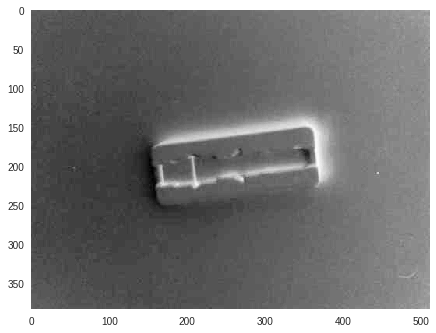

In [0]:
plt.imshow(gray)